## Analisis de Ventas

In [ ]:
import pandas as pd

In [ ]:
ventas = pd.read_csv('ventas.csv', sep=';')

In [ ]:
ventas.head()

,Mes,Ventas
0,01-jan-2017,266.0
1,01-feb-2017,145.9
2,01-mar-2017,183.1
3,01-apr-2017,119.3
4,01-may-2017,180.3


In [ ]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mes     36 non-null     object 
 1   Ventas  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [ ]:
ventas['Mes'] = pd.to_datetime(ventas['Mes'])

In [ ]:
ventas.head()

,Mes,Ventas
0,2017-01-01,266.0
1,2017-02-01,145.9
2,2017-03-01,183.1
3,2017-04-01,119.3
4,2017-05-01,180.3


In [ ]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Mes     36 non-null     datetime64[ns]
 1   Ventas  36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [ ]:
import seaborn as sns

In [ ]:
sns.__version__

'0.11.1'

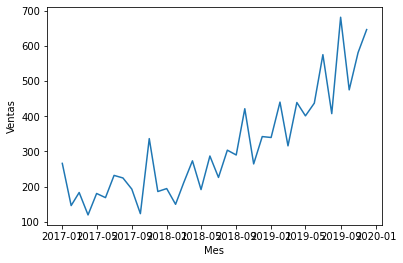

In [ ]:
sns.lineplot(x='Mes', y='Ventas', data=ventas)

In [ ]:
def grafico(titulo, x, y, xlabel, ylabel):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=ventas)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax = ax

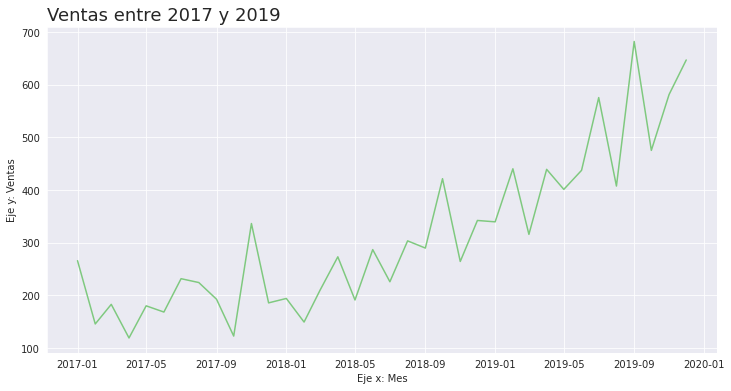

In [ ]:
grafico('Ventas entre 2017 y 2019', 'Mes', 'Ventas', 'Eje x: Mes', 'Eje y: Ventas')

## Descomposición de series temporales

In [ ]:
ventas.head()

,Mes,Ventas
0,2017-01-01,266.0
1,2017-02-01,145.9
2,2017-03-01,183.1
3,2017-04-01,119.3
4,2017-05-01,180.3


In [ ]:
ventas['Variacion'] = ventas['Ventas'].diff()
ventas.head()

,Mes,Ventas,Variacion
0,2017-01-01,266.0,NaN
1,2017-02-01,145.9,-120.1
2,2017-03-01,183.1,37.2
3,2017-04-01,119.3,-63.8
4,2017-05-01,180.3,61.0


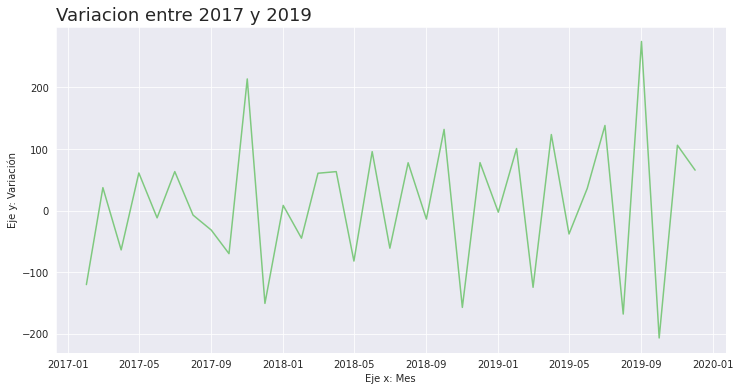

In [ ]:
grafico('Variacion entre 2017 y 2019', 'Mes', 'Variacion', 'Eje x: Mes', 'Eje y: Variación')

In [ ]:
ventas['Aceleracion'] = ventas['Variacion'].diff()
ventas.head()

,Mes,Ventas,Variacion,Aceleracion
0,2017-01-01,266.0,NaN,NaN
1,2017-02-01,145.9,-120.1,NaN
2,2017-03-01,183.1,37.2,157.3
3,2017-04-01,119.3,-63.8,-101.0
4,2017-05-01,180.3,61.0,124.8


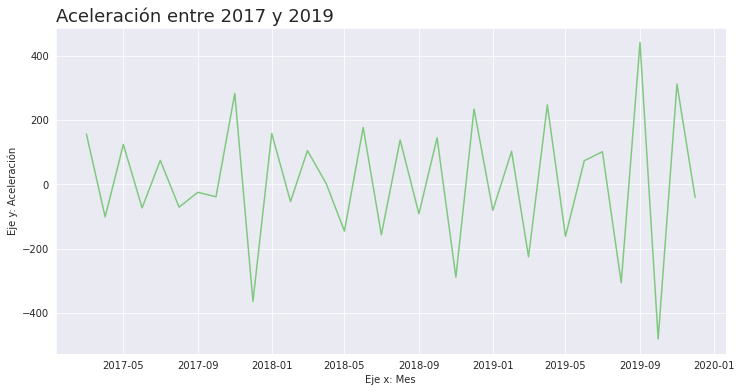

In [ ]:
grafico('Aceleración entre 2017 y 2019', 'Mes', 'Aceleracion', 'Eje x: Mes', 'Eje y: Aceleración')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def comparacion_grafico(titulo, dataset, x, y1, y2, y3):
    plt.figure(figsize=(16,11))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, loc='left', fontsize=18)
    sns.lineplot(x=x, y= y1, data= dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y= y2, data= dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y= y3, data= dataset)
    ax = ax

In [ ]:
ventas.head()

,Mes,Ventas,Variacion,Aceleracion
0,2017-01-01,266.0,NaN,NaN
1,2017-02-01,145.9,-120.1,NaN
2,2017-03-01,183.1,37.2,157.3
3,2017-04-01,119.3,-63.8,-101.0
4,2017-05-01,180.3,61.0,124.8


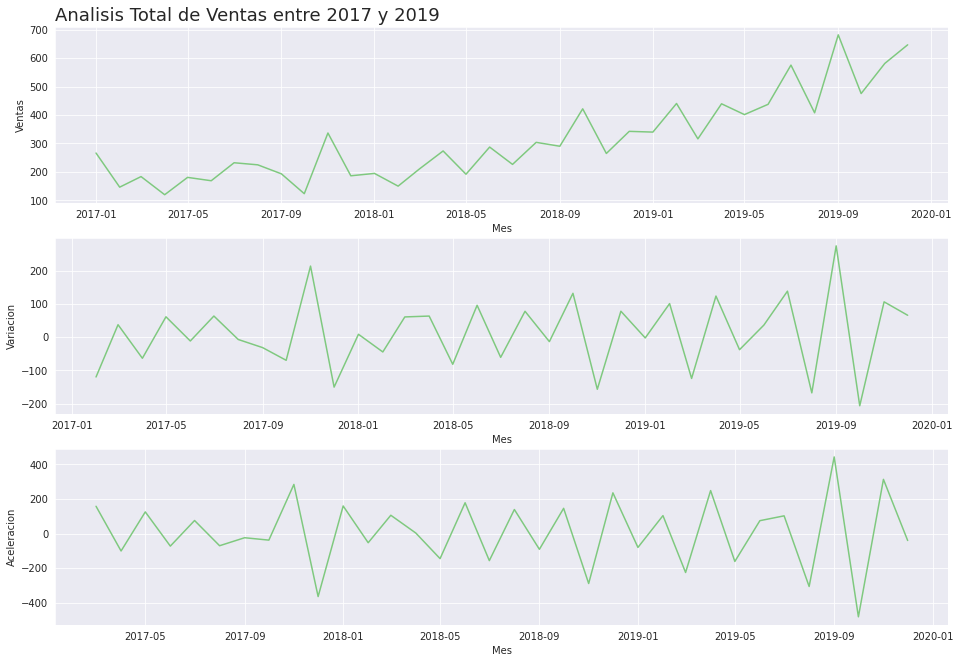

In [ ]:
comparacion_grafico('Analisis Total de Ventas entre 2017 y 2019', ventas, 'Mes', 'Ventas', 'Variacion', 'Aceleracion')

## Autocorrelación

In [ ]:
from pandas.plotting import autocorrelation_plot

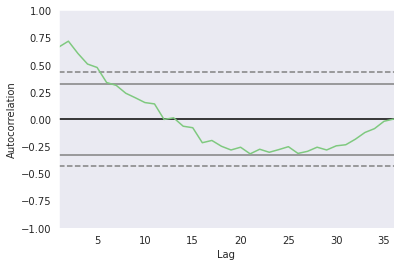

In [ ]:
autocorrelation_plot(ventas['Ventas']);

## Grupos

In [ ]:
ventas.head()

,Mes,Ventas,Variacion,Aceleracion
0,2017-01-01,266.0,NaN,NaN
1,2017-02-01,145.9,-120.1,NaN
2,2017-03-01,183.1,37.2,157.3
3,2017-04-01,119.3,-63.8,-101.0
4,2017-05-01,180.3,61.0,124.8


In [ ]:
agrup_ventas = ventas[['Mes', 'Ventas']].groupby(pd.Grouper(key='Mes', freq='Q')).sum()

In [ ]:
agrup_ventas.head()

,Ventas
Mes,
2017-03-31,595.0
2017-06-30,468.1
2017-09-30,649.1
2017-12-31,645.3
2018-03-31,553.9


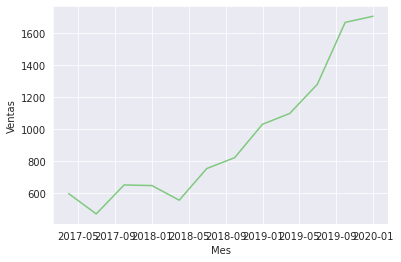

In [ ]:
sns.lineplot(x='Mes', y='Ventas', data=agrup_ventas)

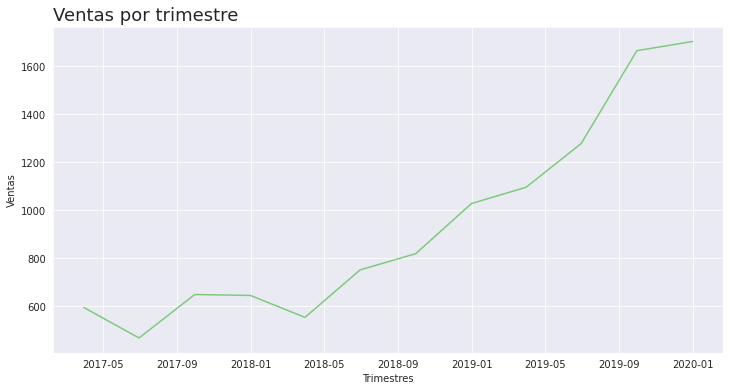

In [ ]:
ax = sns.lineplot(x='Mes', y='Ventas', data=agrup_ventas)
ax.figure.set_size_inches(12,6)
ax.set_title('Ventas por trimestre', loc='left', fontsize=18)
ax.set_xlabel('Trimestres')
ax.set_ylabel('Ventas')
ax = ax

## Componente Estacional

In [ ]:
df = pd.read_csv('analisis_visitas_playa.csv', sep=';')

In [ ]:
df.tail()

,Mes,visitas
187,01-aug-2019,80
188,01-sep-2019,59
189,01-oct-2019,51
190,01/nov/19,49
191,01-dec-2019,52


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Mes      192 non-null    object
 1   visitas  192 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [ ]:
df['Mes'] = pd.to_datetime(df['Mes'])

In [ ]:
df.head()

,Mes,visitas
0,2004-01-01,78
1,2004-02-01,72
2,2004-03-01,76
3,2004-04-01,75
4,2004-05-01,80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Mes      192 non-null    datetime64[ns]
 1   visitas  192 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [ ]:
def grafico2(titulo, x, y, xlabel, ylabel, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(18,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax = ax

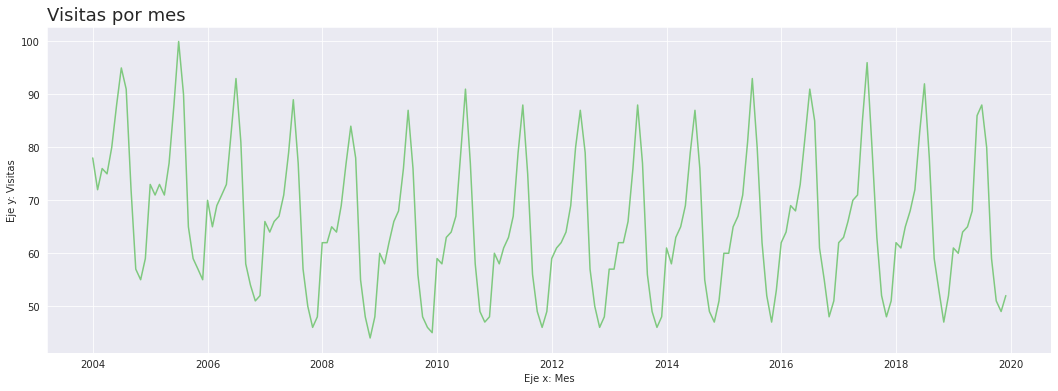

In [ ]:
grafico2('Visitas por mes', 'Mes', 'visitas', 'Eje x: Mes', 'Eje y: Visitas', df)

In [ ]:
df['Variacion'] = df['visitas'].diff()
df['Aceleración'] = df['Variacion'].diff()

In [ ]:
df.head()

,Mes,visitas,Variacion,Aceleración
0,2004-01-01,78,NaN,NaN
1,2004-02-01,72,-6.0,NaN
2,2004-03-01,76,4.0,10.0
3,2004-04-01,75,-1.0,-5.0
4,2004-05-01,80,5.0,6.0


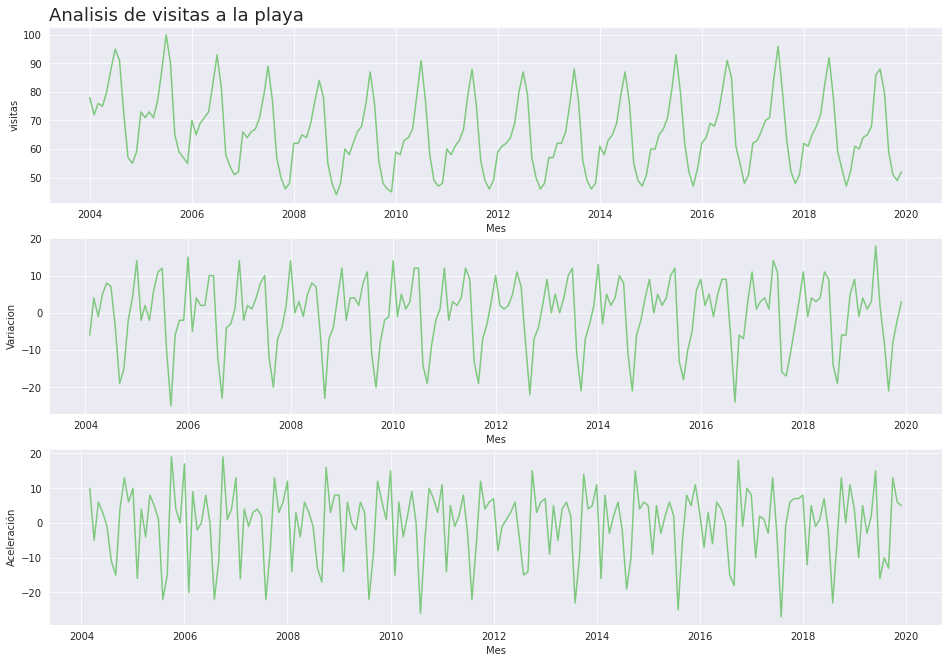

In [ ]:
comparacion_grafico('Analisis de visitas a la playa', df, 'Mes', 'visitas', 'Variacion', 'Aceleración')

## Statsmodels

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
resultado = seasonal_decompose([df['visitas']], freq=12)

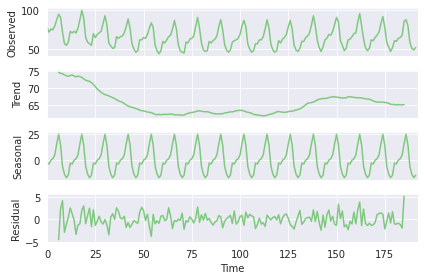

In [ ]:
ax = resultado.plot()

In [ ]:
observadas = resultado.observed
tendencia = resultado.trend
estacionalidad = resultado.seasonal
residuo = resultado.resid

In [ ]:
data = ({
    'observadas': observadas
    , 'tendencia': tendencia
    , 'estacionalidad': estacionalidad
    , 'residuo': residuo
})

In [ ]:
df_decompose = pd.DataFrame(data)

In [ ]:
df_decompose.head(12)

,observadas,tendencia,estacionalidad,residuo
0,78,NaN,-3.227083,NaN
1,72,NaN,-4.110417,NaN
2,76,NaN,-0.377083,NaN
3,75,NaN,1.009028,NaN
4,80,NaN,4.775694,NaN
5,88,NaN,15.611806,NaN
6,95,74.625000,24.906250,-4.531250
7,91,74.375000,14.253472,2.371528
8,72,74.208333,-6.346528,4.138194
9,57,73.916667,-14.018750,-2.897917


## Series Estacionarias

In [ ]:
nacimientos = pd.read_csv('nacimientos.csv', sep=';')

In [ ]:
nacimientos.head()

,Dia,Nacimientos
0,01/01/2019,35
1,02/01/2019,32
2,03/01/2019,30
3,04/01/2019,31
4,05/01/2019,44


In [ ]:
nacimientos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Dia          365 non-null    datetime64[ns]
 1   Nacimientos  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [ ]:
nacimientos['Dia'] = pd.to_datetime(nacimientos['Dia'])

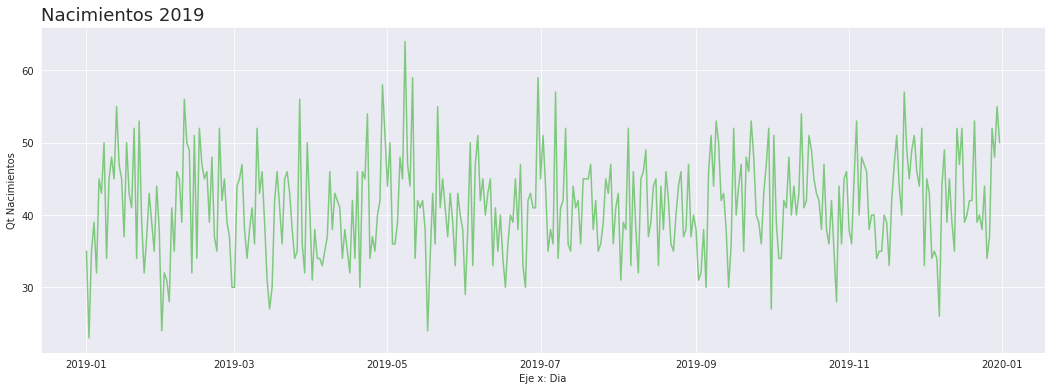

In [ ]:
grafico2('Nacimientos 2019', 'Dia', 'Nacimientos', 'Eje x: Dia', 'Qt Nacimientos', nacimientos)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
x = nacimientos['Nacimientos']
result = adfuller(x)

In [ ]:
type(result)

tuple

In [ ]:
print('ADF statistic: %f ' % result[0])
print('P-value: %f ' % result[1])
print('Valores Criticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF statistic: -16.365890 
P-value: 0.000000 
Valores Criticos:
	1%: -3.448
	5%: -2.870
	10%: -2.571


H0: No es estacionaria, la variable depende de lo ocurrió en periodos anteriores, (tiene tendencia o es estacional)

H1: Es estacionaria

In [ ]:
from pandas.plotting import autocorrelation_plot

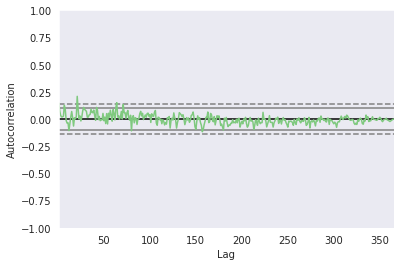

In [ ]:
autocorrelation_plot(nacimientos['Nacimientos']);

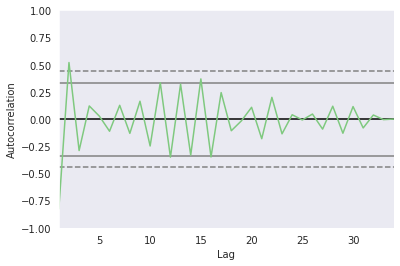

In [ ]:
autocorrelation_plot(ventas['Aceleracion'].dropna());